In [ ]:
#Importing of packages
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.decomposition import PCA
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive 
#drive.mount('/content/drive')
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /content/drive/My\ Drive/BT4222_shared

[Errno 2] No such file or directory: '/content/drive/My Drive/BT4222_shared'
/content


In [ ]:
%cd /content/drive/Shared with me /BT4222_shared

[Errno 2] No such file or directory: '/content/drive/Shared with me /BT4222_shared'
/content


In [ ]:
ls -l

total 8
drwx------ 6 root root 4096 Apr  5 14:02 drive/
drwxr-xr-x 1 root root 4096 Mar 23 14:22 sample_data/


In [ ]:
#data=pd.read_csv('Jupyter Notebooks/version2.0/data.csv',index_col=0)
data=pd.read_excel('/gdrive/My Drive/data.xlsx',index_col=0).reset_index(drop=True)

In [ ]:
data

,Companies,ESG Risk Score,ESG Risk Rating,Detailed ESG Risk Rating,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Page Count,Sentence Count,Word Count
0,24SevenOffice Group,24.6,Medium ESG Risk,Lower Medium ESG Risk,0.357958,0.000000,0.000000,0.000000,0.0000,0.471713,0.375589,0.218405,0.330786,44.0,251.0,8575.0
1,"2U, Inc",19.8,Low ESG Risk,Upper Low ESG Risk,0.226180,-0.077200,-0.077200,-0.077200,0.0000,0.563257,0.406256,0.275578,0.390339,38.0,156.0,5429.0
2,Absolute Software Corp,24.1,Medium ESG Risk,Lower Medium ESG Risk,-0.279050,-0.229400,-0.421500,-0.421500,0.0000,0.000000,0.231411,0.827100,0.488943,2.0,19.0,474.0
3,Accenture,9.7,Negligible ESG Risk,Upper Negligible ESG Risk,0.632968,0.453108,-0.421500,0.744725,0.0000,0.610265,0.381267,0.518605,0.600880,15.0,150.0,4690.0
4,"ACI Worldwide, Inc",20.8,Medium ESG Risk,Lower Medium ESG Risk,0.399900,0.353917,0.470240,0.177225,0.0000,0.678200,0.290737,0.232244,0.263880,39.0,150.0,4914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Zensar Technologies Ltd,21.0,Medium ESG Risk,Lower Medium ESG Risk,0.519007,0.554624,0.456533,0.322510,-0.1342,0.585565,0.314756,0.310512,0.408028,308.0,2595.0,103962.0
470,"Ziff Davis, Inc",16.6,Low ESG Risk,Upper Low ESG Risk,0.364913,0.207307,0.031254,0.419804,0.0000,0.452695,0.386117,0.355613,0.494935,64.0,415.0,16363.0
471,Zillow Group Inc,24.2,Medium ESG Risk,Lower Medium ESG Risk,0.491300,0.415650,0.374620,0.000000,0.0000,0.563543,0.420628,0.495229,0.493877,22.0,255.0,8024.0
472,Zix Corp,24.3,Medium ESG Risk,Lower Medium ESG Risk,0.679810,0.635990,0.000000,0.000000,0.0000,0.544560,0.406913,0.457529,0.364438,8.0,98.0,2867.0


In [ ]:
# Visualise distribution of ESG Ratings
import plotly.express as px
freq_df = pd.DataFrame(data['Detailed ESG Risk Rating'].value_counts()).reset_index()
fig=px.bar(freq_df, x='index', y='Detailed ESG Risk Rating', color="index")
fig.show()

In [ ]:
# Split into 60% training,20% validation, 20% test
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(columns=['Detailed ESG Risk Rating']),
    data['Detailed ESG Risk Rating'],
    test_size=0.4,
    random_state=123
    )

x_test, x_validation, y_test, y_validation = train_test_split(
    x_test,
    y_test,
    test_size=0.5,
    random_state=123
    )

In [ ]:
print(x_train.shape[0])
print(x_validation.shape[0])
print(x_test.shape[0])

284
95
95


In [ ]:
x_train

,Companies,ESG Risk Score,ESG Risk Rating,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Page Count,Sentence Count,Word Count
297,NetEnt,14.3,Low ESG Risk,0.532954,0.177616,0.000000,0.312600,0.000000,0.288267,0.294695,0.274439,0.289218,93.0,1022.0,32496.0
367,Samsung SDS Co Ltd,20.1,Medium ESG Risk,0.713362,0.600119,0.822920,0.699667,0.915167,0.676430,0.625753,0.612243,0.589315,112.0,793.0,41596.0
440,Verint Systems Inc,20.1,Medium ESG Risk,0.709474,0.344100,0.806950,0.070354,-0.003257,0.547786,0.515193,0.560218,0.612555,31.0,282.0,9136.0
71,"CGI, Inc",17.0,Low ESG Risk,0.630958,0.401309,-0.005942,0.109571,0.000000,0.336579,0.438339,0.389706,0.428446,116.0,846.0,27180.0
94,"Coursera, Inc",25.6,Medium ESG Risk,0.425950,0.893400,0.000000,0.000000,0.000000,0.646883,0.538164,0.780167,0.781660,26.0,119.0,4040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Lakala Payment Co Ltd,25.3,Medium ESG Risk,0.544917,0.175731,0.132729,0.332915,0.116483,0.475819,0.354332,0.400265,0.415188,311.0,2637.0,103529.0
98,CWT International Ltd,26.7,Medium ESG Risk,0.450341,0.284005,0.393827,0.159335,0.052721,0.776182,0.433091,0.474175,0.303951,67.0,296.0,12066.0
322,Origo,22.5,Medium ESG Risk,0.531685,0.034461,0.500944,0.123110,0.000000,-0.144000,0.202669,0.457650,0.126350,17.0,79.0,2244.0
382,"ShotSpotter, Inc",22.8,Medium ESG Risk,0.560470,0.150567,-0.147100,-0.153350,0.000000,0.291430,0.523394,0.733304,0.520349,43.0,371.0,11276.0


In [ ]:
x_validation

,Companies,ESG Risk Score,Detailed ESG Risk Rating,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Page Count,Sentence Count,Word Count
151,Fortinet Inc,19.3,Upper Low ESG Risk,0.369511,0.000000,0.000000,0.000000,0.000000,0.440090,0.495047,0.513822,0.433900,12.0,108.0,2884.0
352,Rakus Co Ltd,29.5,Upper Medium ESG Risk,0.608868,0.156114,0.000000,0.136600,0.000000,0.611850,0.516778,0.533050,0.566921,32.0,219.0,7350.0
234,Leo Group Co Ltd,32.8,Lower High ESG Risk,0.481830,0.045277,0.103008,-0.085345,-0.093973,0.361138,0.338033,0.409951,0.352795,94.0,390.0,12727.0
397,Square Enix Holdings Co Ltd,17.5,Upper Low ESG Risk,0.711900,0.000000,0.000000,0.000000,0.000000,0.668467,0.502035,0.394552,0.341249,10.0,176.0,7002.0
196,Inke Ltd,28.8,Upper Medium ESG Risk,0.345411,-0.158250,0.320371,0.187829,0.000000,0.481293,0.288868,0.347311,0.351013,173.0,1268.0,47623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Cognizant Technology Solutions Corp,17.5,Upper Low ESG Risk,0.494440,0.205813,0.142490,0.147440,0.000000,0.480956,0.418948,0.453805,0.370244,50.0,501.0,14944.0
37,BAIOO Family Interactive Ltd,18.6,Upper Low ESG Risk,0.527105,0.318600,0.319671,0.431884,0.110250,0.511538,0.384578,0.340797,0.378300,234.0,1428.0,59789.0
199,International Business Machines Corp,14.8,Lower Low ESG Risk,0.537435,0.339885,0.177711,0.185255,-0.151680,0.465232,0.473735,0.387213,0.485137,48.0,555.0,16664.0
75,China Development Bank Financial Leasing Co,26.9,Upper Medium ESG Risk,0.648831,0.499071,0.396982,0.406133,0.999100,0.677395,0.575729,0.519810,0.456355,37.0,471.0,16682.0


                           precision    recall  f1-score   support

      Lower High ESG Risk       0.00      0.00      0.00         3
       Lower Low ESG Risk       0.00      0.00      0.00         8
    Lower Medium ESG Risk       0.38      0.51      0.44        35
       Upper Low ESG Risk       0.38      0.53      0.44        34
    Upper Medium ESG Risk       0.00      0.00      0.00        13
Upper Negligible ESG Risk       0.00      0.00      0.00         2

                 accuracy                           0.38        95
                macro avg       0.13      0.17      0.15        95
             weighted avg       0.28      0.38      0.32        95

accuracy score is 0.37894736842105264


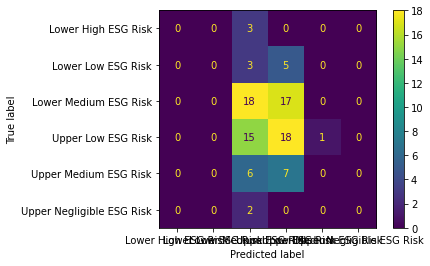

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
decision_tree.fit(x_train[x_train.columns.tolist()[3:]],y_train)
plot_confusion_matrix(decision_tree,x_validation[x_validation.columns.tolist()[3:]],y_validation)

print(classification_report(y_validation,decision_tree.predict(x_validation[x_validation.columns.tolist()[3:]])))
print('accuracy score is {}'.format(accuracy_score(y_validation,decision_tree.predict(x_validation[x_validation.columns.tolist()[3:]]))))

In [ ]:
# Grid Search for Decision Tree
parameters=[{'criterion':['gini','entropy'],'max_depth':[2,3,4,5]}]
clf=GridSearchCV(decision_tree,parameters)
clf.fit(x_train[x_train.columns.tolist()[3:]],y_train)

print(clf.best_score_)
print(clf.best_params_)

0.4223684210526315
{'criterion': 'gini', 'max_depth': 3}


                       precision    recall  f1-score   support

   Lower Low ESG Risk       0.00      0.00      0.00        10
Lower Medium ESG Risk       0.61      0.59      0.60        46
   Upper Low ESG Risk       0.42      0.75      0.54        28
Upper Medium ESG Risk       0.00      0.00      0.00        11

             accuracy                           0.51        95
            macro avg       0.26      0.33      0.28        95
         weighted avg       0.42      0.51      0.45        95

accuracy score is 0.5052631578947369


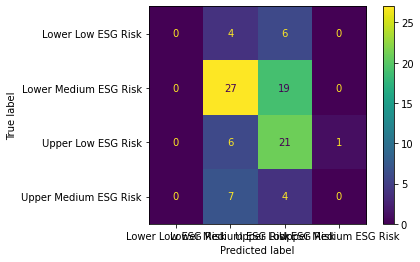

In [ ]:
plot_confusion_matrix(decision_tree,x_test[x_test.columns.tolist()[3:]],y_test)

print(classification_report(y_test,decision_tree.predict(x_test[x_test.columns.tolist()[3:]])))
print('accuracy score is {}'.format(accuracy_score(y_test,decision_tree.predict(x_test[x_test.columns.tolist()[3:]]))))

In [ ]:
# Find the hyperparameters on Decision Tree with the highest accuracy on validation set
from sklearn import metrics
accuracy_scores=[]
for i in ['gini','entropy']:
  for j in range(1,10):
     decision_tree=DecisionTreeClassifier(criterion=i,max_depth=j)
     decision_tree.fit(x_train[x_train.columns.tolist()[3:]],y_train)
     acc=metrics.accuracy_score(y_validation,decision_tree.predict(x_validation[x_validation.columns.tolist()[3:]]))
     accuracy_scores.append((i,j,acc))

In [ ]:
accuracy_scores

[('gini', 1, 0.3684210526315789),
 ('gini', 2, 0.37894736842105264),
 ('gini', 3, 0.4105263157894737),
 ('gini', 4, 0.35789473684210527),
 ('gini', 5, 0.3368421052631579),
 ('gini', 6, 0.3263157894736842),
 ('gini', 7, 0.35789473684210527),
 ('gini', 8, 0.3473684210526316),
 ('gini', 9, 0.35789473684210527),
 ('entropy', 1, 0.3684210526315789),
 ('entropy', 2, 0.3473684210526316),
 ('entropy', 3, 0.28421052631578947),
 ('entropy', 4, 0.3263157894736842),
 ('entropy', 5, 0.42105263157894735),
 ('entropy', 6, 0.3894736842105263),
 ('entropy', 7, 0.42105263157894735),
 ('entropy', 8, 0.35789473684210527),
 ('entropy', 9, 0.3368421052631579)]

In [ ]:
maximum_tree_validation=max(list(map(lambda x:x[2],accuracy_scores)))
list(filter(lambda x:x[2]==maximum_tree_validation,accuracy_scores))

[('entropy', 5, 0.42105263157894735), ('entropy', 7, 0.42105263157894735)]

                       precision    recall  f1-score   support

   Lower Low ESG Risk       0.50      0.10      0.17        10
Lower Medium ESG Risk       0.44      0.67      0.53        46
   Upper Low ESG Risk       0.25      0.14      0.18        28
Upper Medium ESG Risk       0.14      0.09      0.11        11

             accuracy                           0.39        95
            macro avg       0.33      0.25      0.25        95
         weighted avg       0.36      0.39      0.34        95

accuracy score is 0.3894736842105263


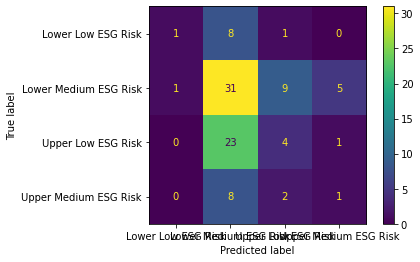

In [ ]:
decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
decision_tree.fit(x_train[x_train.columns.tolist()[3:]],y_train)
plot_confusion_matrix(decision_tree,x_test[x_test.columns.tolist()[3:]],y_test)
print(classification_report(y_test,decision_tree.predict(x_test[x_test.columns.tolist()[3:]])))
print('accuracy score is {}'.format(accuracy_score(y_test,decision_tree.predict(x_test[x_test.columns.tolist()[3:]]))))

In [ ]:
svm=SVC(kernel='linear',C=20)
svm.fit(x_train[x_train.columns.tolist()[3:]],y_train)
plot_confusion_matrix(svm,x_validation[x_validation.columns.tolist()[3:]],y_validation)
print(classification_report(y_validation,svm.predict(x_validation[x_validation.columns.tolist()[3:]])))
print('accuracy score is {}'.format(accuracy_score(y_validation,svm.predict(x_validation[x_validation.columns.tolist()[3:]]))))

KeyboardInterrupt: ignored

                 precision    recall  f1-score   support

  High ESG Risk       0.00      0.00      0.00         1
   Low ESG Risk       0.00      0.00      0.00        33
Medium ESG Risk       0.57      0.96      0.71        47

       accuracy                           0.56        81
      macro avg       0.19      0.32      0.24        81
   weighted avg       0.33      0.56      0.41        81

accuracy score is 0.5555555555555556


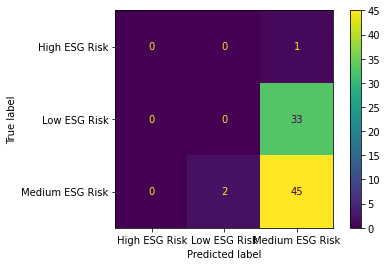

In [ ]:
svm=SVC(kernel='linear',C=20)
svm.fit(x_train[x_train.columns.tolist()[2:]],y_train)
plot_confusion_matrix(svm,x_test[x_test.columns.tolist()[2:]],y_test)
print(classification_report(y_test,svm.predict(x_test[x_test.columns.tolist()[2:]])))
print('accuracy score is {}'.format(accuracy_score(y_test,svm.predict(x_test[x_test.columns.tolist()[2:]]))))

In [ ]:
# Grid Search for SVM
parameters=[{'kernel':['poly','rbf','linear'],'C':[1,5,10,15,20,50,100]}]
clf=GridSearchCV(svm,parameters)
clf.fit(x_train[x_train.columns.tolist()[2:]],y_train)
print(clf.best_score_)
print(clf.best_params_)

0.5779761904761904
{'C': 20, 'kernel': 'linear'}


In [ ]:
# Find the hyperparameters on SVM with the highest accuracy on validation set
from sklearn import metrics
accuracy_scores_svm=[]
for i in ['rbf','poly','linear']:
  for j in range(1,101):
     svm=SVC(kernel=i,C=j)
     svm.fit(x_train[x_train.columns.tolist()[2:]],y_train)
     acc=metrics.accuracy_score(y_validation,svm.predict(x_validation[x_validation.columns.tolist()[2:]]))
     accuracy_scores_svm.append((i,j,acc))

In [ ]:
maximum_svm_validation=max(list(map(lambda x:x[2],accuracy_scores_svm)))
list(filter(lambda x:x[2]==maximum_svm_validation,accuracy_scores_svm))

[('rbf', 5, 0.6463414634146342)]

                 precision    recall  f1-score   support

  High ESG Risk       0.00      0.00      0.00         1
   Low ESG Risk       0.45      0.15      0.23        33
Medium ESG Risk       0.59      0.87      0.70        47

       accuracy                           0.57        81
      macro avg       0.35      0.34      0.31        81
   weighted avg       0.53      0.57      0.50        81

accuracy score is 0.5679012345679012


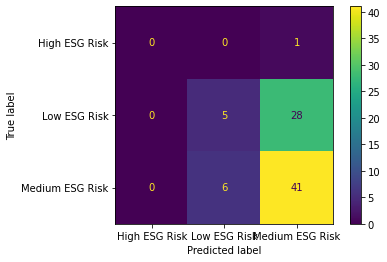

In [ ]:
svm=SVC(kernel='rbf',C=5)
svm.fit(x_train[x_train.columns.tolist()[2:]],y_train)
plot_confusion_matrix(svm,x_test[x_test.columns.tolist()[2:]],y_test)
print(classification_report(y_test,svm.predict(x_test[x_test.columns.tolist()[2:]])))
print('accuracy score is {}'.format(accuracy_score(y_test,svm.predict(x_test[x_test.columns.tolist()[2:]]))))

                 precision    recall  f1-score   support

   Low ESG Risk       0.60      0.45      0.52        33
Medium ESG Risk       0.68      0.80      0.74        49

       accuracy                           0.66        82
      macro avg       0.64      0.63      0.63        82
   weighted avg       0.65      0.66      0.65        82

accuracy score is 0.6585365853658537


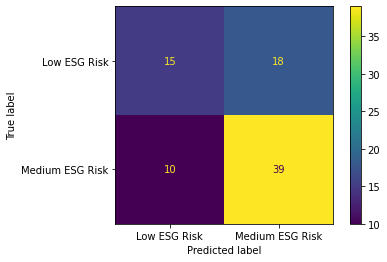

In [ ]:
#Random Forest Classifier
random_forest=ensemble.RandomForestClassifier()
random_forest.fit(x_train[x_train.columns.tolist()[2:]],y_train)
random_forest.predict(x_validation[x_validation.columns.tolist()[2:]])
plot_confusion_matrix(random_forest,x_validation[x_validation.columns.tolist()[2:]],y_validation)
print(classification_report(y_validation,random_forest.predict(x_validation[x_validation.columns.tolist()[2:]])))
print('accuracy score is {}'.format(accuracy_score(y_validation,random_forest.predict(x_validation[x_validation.columns.tolist()[2:]]))))

                 precision    recall  f1-score   support

   Low ESG Risk       0.56      0.45      0.50        33
Medium ESG Risk       0.67      0.76      0.71        49

       accuracy                           0.63        82
      macro avg       0.61      0.60      0.61        82
   weighted avg       0.63      0.63      0.63        82

accuracy score is 0.6341463414634146


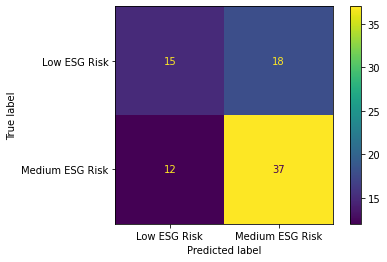

In [ ]:
# Extra Tree Classifier
extra_tree=ensemble.ExtraTreesClassifier()
extra_tree.fit(x_train[x_train.columns.tolist()[2:]],y_train)
extra_tree.predict(x_validation[x_validation.columns.tolist()[2:]])
plot_confusion_matrix(extra_tree,x_validation[x_validation.columns.tolist()[2:]],y_validation)
print(classification_report(y_validation,extra_tree.predict(x_validation[x_validation.columns.tolist()[2:]])))
print('accuracy score is {}'.format(accuracy_score(y_validation,extra_tree.predict(x_validation[x_validation.columns.tolist()[2:]]))))

                     precision    recall  f1-score   support

      High ESG Risk       0.00      0.00      0.00         0
       Low ESG Risk       0.53      0.48      0.51        33
    Medium ESG Risk       0.68      0.65      0.67        49
Negligible ESG Risk       0.00      0.00      0.00         0

           accuracy                           0.59        82
          macro avg       0.30      0.28      0.29        82
       weighted avg       0.62      0.59      0.60        82

accuracy score is 0.5853658536585366


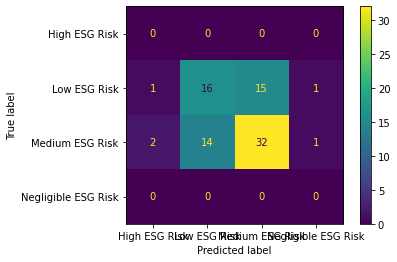

In [ ]:
# Gradient Boosting
adaboost=ensemble.GradientBoostingClassifier()
adaboost.fit(x_train[x_train.columns.tolist()[2:]],y_train)
adaboost.predict(x_validation[x_validation.columns.tolist()[2:]])
plot_confusion_matrix(adaboost,x_validation[x_validation.columns.tolist()[2:]],y_validation)
print(classification_report(y_validation,adaboost.predict(x_validation[x_validation.columns.tolist()[2:]])))
print('accuracy score is {}'.format(accuracy_score(y_validation,adaboost.predict(x_validation[x_validation.columns.tolist()[2:]]))))